In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets

# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

In [ ]:
# Importing and loading dataset from GitHub

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.3,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.1,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,nan,1,2,23.4,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True


**Beginning General EDA**

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.0,891.0,714.0,891.0,891.0,891.0
mean,0.4,2.3,29.7,0.5,0.4,32.2
std,0.5,0.8,14.5,1.1,0.8,49.7
min,0.0,1.0,0.4,0.0,0.0,0.0
25%,0.0,2.0,20.1,0.0,0.0,7.9
50%,0.0,3.0,28.0,0.0,0.0,14.5
75%,1.0,3.0,38.0,1.0,0.0,31.0
max,1.0,3.0,80.0,8.0,6.0,512.3


In [ ]:
#@title Visualising the Dataset in Facets

fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': titanic, 'name': 'Titanic'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Creating a subset dataframe for this task :

In [ ]:
used_df = pd.read_csv(url, usecols= ["survived", "pclass", "sex", "age", "fare"])
used_df

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2
1,1,1,female,38.0,71.3
2,1,3,female,26.0,7.9
3,1,1,female,35.0,53.1
4,0,3,male,35.0,8.1
...,...,...,...,...,...
886,0,2,male,27.0,13.0
887,1,1,female,19.0,30.0
888,0,3,female,nan,23.4
889,1,1,male,26.0,30.0


In [ ]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [ ]:
used_df.describe()

,survived,pclass,age,fare
count,891.0,891.0,714.0,891.0
mean,0.4,2.3,29.7,32.2
std,0.5,0.8,14.5,49.7
min,0.0,1.0,0.4,0.0
25%,0.0,2.0,20.1,7.9
50%,0.0,3.0,28.0,14.5
75%,1.0,3.0,38.0,31.0
max,1.0,3.0,80.0,512.3


In [ ]:
used_df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64

177 null cells in 'age' column.

In [ ]:
used_df['age'].median()

28.0

Replacing 'NaN' (i.e. null cells) in 'age' column with the median value and using record 888 to check if executed correctly :

In [ ]:
used_df['age'] = used_df['age'].fillna((used_df['age'].median()))
used_df

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2
1,1,1,female,38.0,71.3
2,1,3,female,26.0,7.9
3,1,1,female,35.0,53.1
4,0,3,male,35.0,8.1
...,...,...,...,...,...
886,0,2,male,27.0,13.0
887,1,1,female,19.0,30.0
888,0,3,female,28.0,23.4
889,1,1,male,26.0,30.0


**Task EDA**<br> Output shows missing data in the following features :<br> **age** : 891 - 714 = 177 (19.9%)<br> **embarked** : 891 - 889 = 2 (2.2e-3%)<br> **deck** : 891 - 203 = 688 (77.2%)<br> **embark_town** : 891 - 889 = 2 (2.2e-3%)<br> With 77.2% and 19.9% missing data in some columns, cleaning this dataset by removing all records with missing data would impact the information within significantly. Also in this instance, the author's choice of columns needed for analysis - survival, class, sex, and fare - have no missing values. However the "age" column has missing data (i.e. NaN), hence the 'age' column was cleaned by replacing NaN with the median value.

**Questions** :<br> 1. "What is the age distribution of non-survivors?" *(low-level question)*<br>  2. "To what extent did class and sex affect survival?" *(mid-level question)* <br> 3. "Can money buy life - to what extent did fare price affect survival?" *(high-level question)*

Creating new dataframe of non-survivors :

In [ ]:
Did_Not_Survive = used_df[used_df['survived'] == False]
Did_Not_Survive

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2
4,0,3,male,35.0,8.1
5,0,3,male,28.0,8.5
6,0,1,male,54.0,51.9
7,0,3,male,2.0,21.1
...,...,...,...,...,...
884,0,3,male,25.0,7.0
885,0,3,female,39.0,29.1
886,0,2,male,27.0,13.0
888,0,3,female,28.0,23.4


Renaming variable :

In [ ]:
dns = Did_Not_Survive
dns

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2
4,0,3,male,35.0,8.1
5,0,3,male,28.0,8.5
6,0,1,male,54.0,51.9
7,0,3,male,2.0,21.1
...,...,...,...,...,...
884,0,3,male,25.0,7.0
885,0,3,female,39.0,29.1
886,0,2,male,27.0,13.0
888,0,3,female,28.0,23.4


In [ ]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  549 non-null    int64  
 1   pclass    549 non-null    int64  
 2   sex       549 non-null    object 
 3   age       549 non-null    float64
 4   fare      549 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 25.7+ KB


In [ ]:
Q1_and_Q2_table = dns.groupby(['sex','pclass', 'survived'])['survived'].aggregate('count').unstack()
Q1_and_Q2_table

survived         0
sex    pclass     
female 1         3
       2         6
       3        72
male   1        77
       2        91
       3       300

Questions 1 : What is the age distribution of non-survivors?

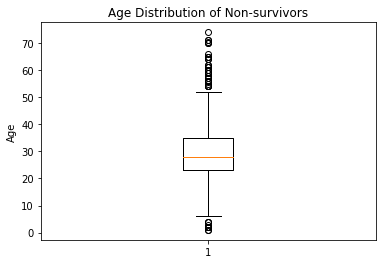

In [ ]:
plt.boxplot(dns['age'])
plt.title('Age Distribution of Non-survivors')
plt.ylabel('Age')
plt.show()

In [ ]:
dns['age'].describe()

count   549.0
mean     30.0
std      12.5
min       1.0
25%      23.0
50%      28.0
75%      35.0
max      74.0
Name: age, dtype: float64

In [ ]:
dns['age'].median()

28.0

Questions 2 : To what extent did class and sex affect survival?

In [ ]:
Q2_table = used_df.groupby(['sex','pclass', 'survived'])['survived'].aggregate('count').unstack()
Q2_table

survived         0   1
sex    pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

blank buffer to enable readable pdf conversion<br>
blank buffer to enable readable pdf conversion<br>
blank buffer to enable readable pdf conversion<br>
blank buffer to enable readable pdf conversion<br>
blank buffer to enable readable pdf conversion<br>
blank buffer to enable readable pdf conversion<br>

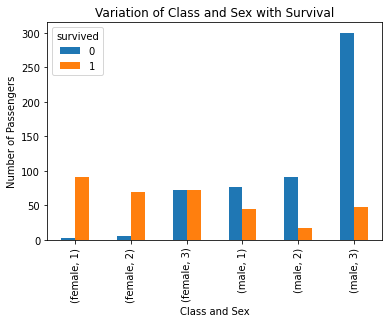

In [ ]:
Q2_table.plot(kind="bar", stacked=False, 
           title="Variation of Class and Sex with Survival",
           xlabel="Class and Sex",
           ylabel="Number of Passengers")

blank buffer to enable readable pdf conversion<br>
blank buffer to enable readable pdf conversion<br>
blank buffer to enable readable pdf conversion<br>


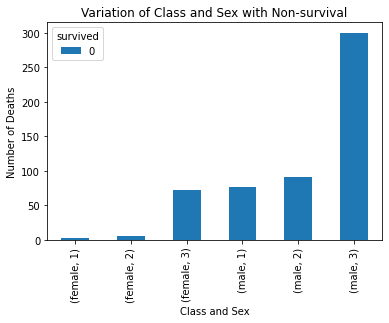

In [ ]:
Q1_and_Q2_table.plot(kind="bar", # stacked=False, 
           title="Variation of Class and Sex with Non-survival",
           xlabel="Class and Sex",
           ylabel="Number of Deaths")

In [ ]:
dns.describe()

,survived,pclass,age,fare
count,549.0,549.0,549.0,549.0
mean,0.0,2.5,30.0,22.1
std,0.0,0.7,12.5,31.4
min,0.0,1.0,1.0,0.0
25%,0.0,2.0,23.0,7.9
50%,0.0,3.0,28.0,10.5
75%,0.0,3.0,35.0,26.0
max,0.0,3.0,74.0,263.0


Question 3 : Can money buy life - to what extent did fare price affect survival?

In [ ]:
Q3a_table = used_df.groupby(['fare', 'survived'])['fare'].aggregate('count')
Q3a_table

fare   survived
0.0    0           14
       1            1
4.0    0            1
5.0    0            1
6.2    0            1
                   ..
247.5  1            1
262.4  1            2
263.0  0            2
       1            2
512.3  1            3
Name: fare, Length: 330, dtype: int64

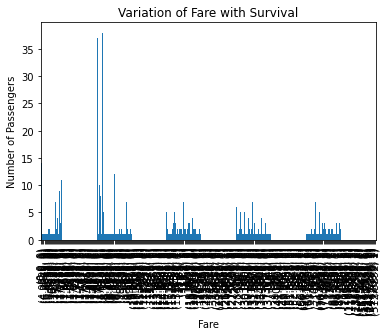

In [ ]:
Q3a_table.plot(kind="bar", stacked=False, 
           title="Variation of Fare with Survival",
           xlabel="Fare",
           ylabel="Number of Passengers")

In [ ]:
Q3a_table.describe()

count   330.0
mean      2.7
std       4.1
min       1.0
25%       1.0
50%       1.0
75%       2.8
max      38.0
Name: fare, dtype: float64

In [ ]:
Q3b_table = used_df.groupby(['fare', 'survived'])['survived'].aggregate('count').unstack()
Q3b_table

survived,0,1
fare,,
0.0,14.0,1.0
4.0,1.0,nan
5.0,1.0,nan
6.2,1.0,nan
6.4,1.0,nan
...,...,...
227.5,1.0,3.0
247.5,1.0,1.0
262.4,nan,2.0


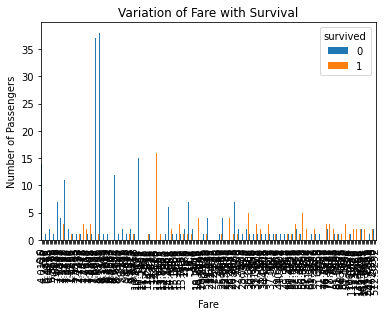

In [ ]:
Q3b_table.plot(kind="bar",  stacked=False, 
           title="Variation of Fare with Survival",
           xlabel="Fare",
           ylabel="Number of Passengers")

In [ ]:
Q3b_table.describe()

survived,0,1
count,177.0,153.0
mean,3.1,2.2
std,5.2,2.2
min,1.0,1.0
25%,1.0,1.0
50%,1.0,2.0
75%,2.0,3.0
max,38.0,16.0


In [ ]:
Q3c_table = dns.groupby(['fare', 'survived'])['survived'].aggregate('count').unstack()
Q3c_table

survived,0
fare,
0.0,14
4.0,1
5.0,1
6.2,1
6.4,1
...,...
211.5,1
221.8,1
227.5,1


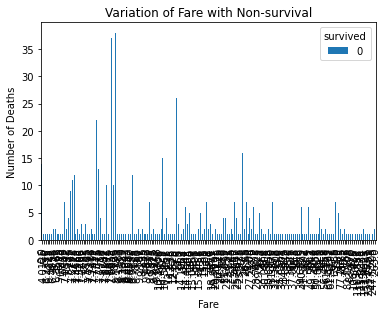

In [ ]:
Q3c_table.plot(kind="bar",  stacked=False, 
           title="Variation of Fare with Non-survival",
           xlabel="Fare",
           ylabel="Number of Deaths")